Evolution Design
--------------------

问题目标函数定义：
$$
\begin{array}{rl} \min\limits_{\mathbf{x}}: & c(\mathbf{x})=\mathbf{U}^{\mathrm{T}}\mathbf{KU=} \displaystyle\sum\limits_{e=1}^{N} E_{e}(x_{e})\mathbf{u}_{e}^{\mathrm{T}}\mathbf{k}_{0}\mathbf{u} _{e}\\ \text{subject to}: & V(\mathbf{x)}/V_{0}=f\\ & \mathbf{K} \mathbf{U} = \mathbf{F}\\ & \mathbf{0} \le \mathbf{x} \le \mathbf{1} \end{array}
$$
使用分布的、离散演化，通过"涌现"优化。


#### 变量命名

|   |   |   |
|:---|---|:---|
| FR  | =  | Filter radius  |
| ER | =  |Evolution rate |
|VF|=  | Volume Fraction |
|$\eta_b$ |=   |Sensitivity of node b|
|$V_a$   |=   |Volume of element a|
|$\lambda_a$|=   |Sensitivity of element a  |
|s |=   | Number of elements connected to  node |
|$V_{m+1}$ |=   |Iterative new target volume|
|$V_m$  |=   |Current volume |
|$d_{ab}$|=   |Distance between centre of an element a and node  b|
|$\lambda^{th}_{del}$|=   |Element sensitivity threshold value  (deleting)|
|$\lambda^{th}_{add}$|=   |Element sensitivity threshold value  (adding)|
|$tol$ |=   |Convergence tolerance, 1e-5 |
|m |=   | Current iteration number |
|T |=   | Number of iterations over which convergence is measured,   5|
|$E_s$ |=   |Young’s Modulus Solid|
|$E_v$ |=   |Young’s Modulus Void|
|$V^*$ |=   |Volume fraction constraint  |
|$SE$  |=   |Strain Energy   |
|$\bigtriangleup SE$ |=   |Change in strain energy |
|y |=   | Distance between the centre and a node of same  element  |
|$u_e$|=   |Elemental  displacement vector|
|$k_e$|=   |Elemental stiffness matrix|
|P|=   |Penalization factor|
|$x_e$|=   |Elemental  density distribution| 
|$\mu_m$|=   |Displacement field at iteration  m| 
|$\rho_{\mathrm{min}}$|=   |Parameter used to prevent singularity| 
|$\rho_m$|=   |Density at the previous cycle| 
|$\zeta$|=   |Move limit| 
|$\eta$|=   |Tuning parameter| 
|$\Lambda_{m}$|=  |Lagrange multiplier at cycle m| 
|$H_f$|=   |Convolution operator| 
|$L_{(x,y)}$|= |Distance between centres of element x and  y| 





#### BESO

BESO算法是澳大利亚皇家墨尔本理工大学谢亿民教授研究团队提出的，可以看作是Querin等人的累加进化结构优化（AESO）和演化结构优化（ESO）方法的组合。 Querin等人最初提出并实施了BESO来改善AESO和ESO的收敛时间。Huang和Xie又提出了一个不同的版本来解决柔度优化问题。 BESO是基于有限元的TO方法，其基本思路是从结构中迭代地去除低效材料，同时在另外一些位置添加有效材料。算法的输入是：
> * 体积分数约束（V *）
> * 演化速率（ER）
> * 滤波器半径（FR）

迭代过程包括以下步骤：
* 在有限元分析之后，得到各个元素的灵敏度；
* 如当前体积$V_m$ > $V^*$, 则$V_{m+1}=V_{m}(1 \pm \mathrm{ER})$
* 然后可以所有元素的灵敏度值进行排序,如果低于$\lambda^{th}_{del}$值的元素被标记为void(密度被设置为1e-12),反之则从void变为solid。
  （这样做是为了在组装整体刚度矩阵之前降低这些元素的刚度贡献，这些void元素在下一次迭代的体积更新步骤后，会重新变为solid。）  
* 这个过程反复重复，直到体积比达到要求，并且应变能的变化收敛。


#### SIMP
Rozvany等人在1992年提出了SIMP方法，丹麦科技大学的Sigmund在2002年给出了一个matlab实现，到今天仍然被作为一个标准的范例。SIMP采用

# 单元（材料）刚度矩阵
KE = generate_stiffness_mat(nu)

在FEA中需要使用$k_e$生成整体刚度矩阵，需转为matrix对象返回，方便执行矩阵乘法。

$\epsilon_e = k_e u_e$

其中，$u_e$包含二维元素4个顶点的(x,y)方向位移，因此$k_e$是一个$8 \times 8$矩阵。

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline  


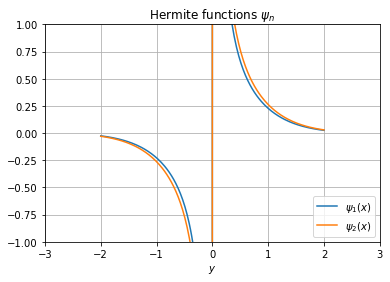

In [33]:
#https://math.unice.fr/~hheumann/Tutorial/_build/intro_matplotlib.html
x = np.linspace(-2, 2, 200)
psi = lambda n,x: 1.0/np.sqrt((2**n*(n+1)*np.sqrt(np.pi))) * np.exp(-x**2/2.0) * n/x

plt.figure()
for n in [1,2]:
    plt.plot(x, psi(n,x), label=r"$\psi_" + str(n)+r"(x)$")

plt.grid(True)
plt.axis([-3, 3, -1, 1])
plt.xlabel(r"$x$")
plt.xlabel(r"$y$")
plt.legend(loc="lower right")
plt.title(r"Hermite functions $\psi_n$")
#plt.plot(x,y)
    #plt.pause(0.05)

plt.show()

In [3]:
# Test
# 1
KE1 = generate_stiffness_mat(0.3)
# 2
KE2 = lk(0.3)

np.set_printoptions(precision=2)
def msg(func_name, *paras):
    print(func_name)
    for p in paras:
        print(p)
    
msg("generate_stiffness_mat()", KE1.shape, KE1)
msg("lk()", KE2.shape, KE2)

if abs(np.max(KE1 - KE2)) < 0.0001:
    print("Sucess")


generate_stiffness_mat()
(8, 8)
[[ 0.49  0.18 -0.3  -0.01 -0.25 -0.18  0.05  0.01]
 [ 0.18  0.49  0.01  0.05 -0.18 -0.25 -0.01 -0.3 ]
 [-0.3   0.01  0.49 -0.18  0.05 -0.01 -0.25  0.18]
 [-0.01  0.05 -0.18  0.49  0.01 -0.3   0.18 -0.25]
 [-0.25 -0.18  0.05  0.01  0.49  0.18 -0.3  -0.01]
 [-0.18 -0.25 -0.01 -0.3   0.18  0.49  0.01  0.05]
 [ 0.05 -0.01 -0.25  0.18 -0.3   0.01  0.49 -0.18]
 [ 0.01 -0.3   0.18 -0.25 -0.01  0.05 -0.18  0.49]]
lk()
(8, 8)
[[ 0.49  0.18 -0.3  -0.01 -0.25 -0.18  0.05  0.01]
 [ 0.18  0.49  0.01  0.05 -0.18 -0.25 -0.01 -0.3 ]
 [-0.3   0.01  0.49 -0.18  0.05 -0.01 -0.25  0.18]
 [-0.01  0.05 -0.18  0.49  0.01 -0.3   0.18 -0.25]
 [-0.25 -0.18  0.05  0.01  0.49  0.18 -0.3  -0.01]
 [-0.18 -0.25 -0.01 -0.3   0.18  0.49  0.01  0.05]
 [ 0.05 -0.01 -0.25  0.18 -0.3   0.01  0.49 -0.18]
 [ 0.01 -0.3   0.18 -0.25 -0.01  0.05 -0.18  0.49]]
Sucess


### 体结构表达

```
[iK, jK, edofMat] = generate_volume(nelx, nely)
```
2D的体结构生成:
- edofMat
每一行包含1个元素4个节点的自由度，每个节点2个DOF，共8个，编号从左下角开始，逆时针顺序排列(见论文Fig.2)。
论文中适用Matlab，从1开始索引，此处适用Python，从0开始索引。
因此通过构造每一个元素第一个自由度，通过列运算，依次得到剩余7列元素。

- iK, jK
列向量，通过Kronecker内积将节点自由度矩阵按行/列扩展8次后，展开成列向量，



In [4]:
def generate_volume(nelx, nely):    
    nodenrs = np.arange(1,(1+nelx)*(1+nely)+1).reshape(1+nely, 1+nelx, order='F').copy();
    edofVec = (2*nodenrs[0:-1, 0:-1] + 1).reshape(nelx * nely, 1, order='F');
    edofMat = np.tile(edofVec,[1,8]) + np.tile(np.hstack([np.hstack([[0,1], 2*nely + np.array([2,3,0,1])]),[-2,-1]]), [nelx*nely,1])
    edofMat -= 1   # python index start from  0 
    iK = np.kron(edofMat, np.ones([8,1])).reshape([64*nelx*nely,1])
    jK = np.kron(edofMat, np.ones([1,8])).reshape([64*nelx*nely,1])
    return iK, jK, edofMat

    

In [5]:
#Ref: 
def mk_edof_mat(nelx, nely):
    edofMat=np.zeros((nelx*nely,8),dtype=int)
    for elx in range(nelx):
        for ely in range(nely):
            el = ely+elx*nely
            n1=(nely+1)*elx+ely
            n2=(nely+1)*(elx+1)+ely
            edofMat[el,:]=np.array([2*n1+2, 2*n1+3, 2*n2+2, 2*n2+3,2*n2, 2*n2+1, 2*n1, 2*n1+1])
    # Construct the index pointers for the coo format
    iK = np.kron(edofMat,np.ones((8,1))).flatten()
    jK = np.kron(edofMat,np.ones((1,8))).flatten()   
    return iK, jK, edofMat

In [24]:
#test
nelx = 4
nely = 3
iK1,jK1,edofMat1 = generate_volume(nelx, nely)
iK2,jK2,edofMat2 = mk_edof_mat(nelx,nely)
msg("ik1", iK1.shape, "ik2",iK2.shape)
msg("jk1", iK1.shape, "jk2",jK2.shape)
msg("edofMat1", edofMat1.shape,"edofMat2", edofMat2.shape, edofMat)




ik1
(768, 1)
ik2
(768,)
jk1
(768, 1)
jk2
(768,)
edofMat1
(12, 8)
edofMat2
(12, 8)
[[ 2  3  8  9  6  7  0  1]
 [ 4  5 10 11  8  9  2  3]
 [ 8  9 14 15 12 13  6  7]
 [10 11 16 17 14 15  8  9]
 [14 15 20 21 18 19 12 13]
 [16 17 22 23 20 21 14 15]]



### 设置边界条件

```
% DEFINE LOADS AND SUPPORTS (HALF MBB-BEAM)
F = sparse(2,1,-1,2*(nely+1)*(nelx+1),1);
U = zeros(2*(nely+1)*(nelx+1),1);
fixeddofs = union([1:2:2*(nely+1)],[2*(nelx+1)*(nely+1)]);
alldofs = [1:2*(nely+1)*(nelx+1)];
freedofs = setdiff(alldofs,fixeddofs);
```

In [7]:
from scipy import sparse

def set_BC1(nelx, nely):
    row = np.array([1])
    col = np.array([0])
    data = np.array([-1])
    F = sparse.csc_matrix((data, (row, col)), shape=(2*(nelx+1)*(nely+1), 1)).toarray()
    U = np.zeros([2*(nely+1)*(nelx+1),1])
    fixeddofs = np.hstack((np.arange(1, 2*(nely+1), 2), [2*(nelx+1)*(nely+1)])) - 1
    alldofs = np.arange(1, 2*(nely+1)*(nelx+1) + 1) - 1
    freedofs = np.array([x for x in alldofs if x not in fixeddofs])
    return F, U, fixeddofs, freedofs, alldofs

# f is not sparse
def set_BC2(nelx, nely):
    ndof = 2*(nelx+1)*(nely+1)
    # BC's and support
    dofs=np.arange(2*(nelx+1)*(nely+1))
    fixed=np.union1d(dofs[0:2*(nely+1):2],np.array([2*(nelx+1)*(nely+1)-1]))
    free=np.setdiff1d(dofs,fixed)
    # Solution and RHS vectors
    f=np.zeros((ndof,1))
    u=np.zeros((ndof,1))
    return f, u, fixed, free, dofs

In [8]:
#Test
F1, U1, Fixed1, Free1, Dofs1 = set_BC1(nelx, nely)
F2, U2, Fixed2, Free2, Dofs2 = set_BC2(nelx, nely)
msg("set_BC1", F1.shape, U1.shape, Free1.shape, Dofs1.shape)
msg("set_BC2", F2.shape, U2.shape, Free2.shape, Dofs2.shape)

set_BC1
(24, 1)
(24, 1)
(20,)
(24,)
set_BC2
(24, 1)
(24, 1)
(20,)
(24,)


### 初始化密度
$\mathbf{V}$是一个$nelx \times nely$的矩阵，密度是SIMP方法中的主要设计变量。

$xPhys$是经过局部滤波后得到的较平滑的密度分布，被称为物理密度，表示设计变量在相应滤波窗口下产生的设计结果。在此处SIMP实现中

* ft = 0, $xPhys = \mathbf{x}$
* ft = 1, $xPhys=\frac{\sum_j{w{(r_{ej})x_j}}} {\sum_j w(r_{ej} )} = \sum_j{\frac{w(r_{ej})}{\sum_j w(r_{ej})} \mathbf{x}}  $

初始时$\mathbf{x} = volfrac * \mathbf{V}$：

In [9]:
def init_density1(nelx, nely, volfrac):
    x = np.tile(volfrac,(nely,nelx))
    xPhys = x;
    return x, xPhys


def init_density2(nelx, nely, volfrac):
    x=volfrac * np.ones(nely*nelx,dtype=float)
    xPhys=x.copy()
    return x, xPhys



In [10]:
# Test
volfrac = 0.6
nelx = 3
nely = 2

x1, xPhys1 = init_density1(nelx, nely, volfrac)
x2, xPhys2 = init_density2(nelx, nely, volfrac)

msg("1",x1)
msg("2",x2)


1
[[ 0.6  0.6  0.6]
 [ 0.6  0.6  0.6]]
2
[ 0.6  0.6  0.6  0.6  0.6  0.6]


### 生成滤波窗口
过滤器密度函数被定义为
实际算法中使用单元灵敏度$x_e$是一个局部邻域的加权平均值
$$\hat x_e=\frac{\sum_j{w{(r_{ej})x_j}}} {\sum_j w(r_{ej} )} = \sum_j{\frac{w(r_{ej})}{\sum_j w(r_{ej})}x}  = \sum_j \eta_j x_j,$$
其中，$w(r_{ej}) = max(0, r_{min}-r_{ej})$，
$r_{ej}=distant(element_e, element_j)$，
w是权重函数; 
$r_{min}$是过滤器半径。
权重因子$\eta_j$只与几何结构相关，可以事先计算，并保存固定权重因子$\eta_j$：

例如：
针对每个elment计算距离场，当rmin比较小时，这是一个稀疏矩阵：
$$
H = \begin{bmatrix}
 0 &  0            & 1     & 2      & \dots & nelx \times nely \\    
 0 & d_{00}       & d_{01} & x_{02} & \dots & d_{0n} \\
 1 & d_{10}       & d_{11} & x_{12} & \dots & d_{1n} \\
 \dots \\
 nelx \times nely &  d_{y0}       & d_{y1} & d_{y3} & \dots & d_{yn}
\end{bmatrix}
$$

$$Hs = 
\begin{bmatrix} 
\sum_j w(r_{ej})_0 \\
\dots \\
\sum_j w(r_{ej})_{nely * nelx - 1}
\end{bmatrix}
$$
H, Hs = preFilter(rmin)

In [11]:
def preFilter1(rmin):
    nTotal = nelx*nely*(2*(np.ceil(rmin)-1)+1)**2    # nTotal = x*y*Neighbors_per_element
    iH = np.ones(int(nTotal))
    jH = np.ones(iH.shape)
    sH = np.zeros(iH.shape)
    
    k = 0
    for i in np.arange(0,nelx):
        for j in np.arange(0,nely):
            e = i*nely + j
            neighbor_size = np.ceil(rmin) - 1 # unit: element
            neighbor_x = np.arange(max(i-neighbor_size, 0), min(i+neighbor_size+1, nelx))
            neighbor_y = np.arange(max(j-neighbor_size, 0), min(j+neighbor_size+1, nely))
            #(row, col ) = value
            for ni in neighbor_x:
                for nj in neighbor_y:
                    neighbor_e = ni * nely + nj
                    iH[k] = e                       #row                
                    jH[k] = neighbor_e              #col
                    sH[k] = max(0, rmin - np.sqrt((ni-i)**2 +(nj-j)**2 ))#value
                    k += 1
    
    H = sparse.csc_matrix((sH, (iH, jH)) )
    Hs = np.sum(H, axis=1)
    return H, Hs

from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve
def preFilter2(rmin):
    nfilter=nelx*nely*((2*(np.ceil(rmin)-1)+1)**2)
    nfilter = int(nfilter)
    iH = np.zeros(nfilter)
    jH = np.zeros(nfilter)
    sH = np.zeros(nfilter)
    cc=0
    for i in range(nelx):
        for j in range(nely):
            row=i*nely+j
            kk1=int(np.maximum(i-(np.ceil(rmin)-1),0))
            kk2=int(np.minimum(i+np.ceil(rmin),nelx))
            ll1=int(np.maximum(j-(np.ceil(rmin)-1),0))
            ll2=int(np.minimum(j+np.ceil(rmin),nely))
            for k in range(kk1,kk2):
                for l in range(ll1,ll2):
                    col=k*nely+l
                    fac=rmin-np.sqrt(((i-k)*(i-k)+(j-l)*(j-l)))
                    iH[cc]=row
                    jH[cc]=col
                    sH[cc]=np.maximum(0.0,fac)
                    cc=cc+1
    # Finalize assembly and convert to csc format
    H=coo_matrix((sH,(iH,jH)),shape=(nelx*nely,nelx*nely)).tocsc()    
    Hs=H.sum(1)
    return H, Hs

In [12]:
#Test
rmin = 1.2
H1, Hs1 = preFilter1(rmin)
H2, Hs2 = preFilter2(rmin)


msg("1", H1.shape, Hs1.shape)
msg("2", H2.shape, Hs2.shape)

if abs(np.max(H1 - H2)) < 0.0001 and abs(np.max(Hs1 - Hs2)) < 0.0001:
    print("Sucess")

    

1
(6, 6)
(6, 1)
2
(6, 6)
(6, 1)
Sucess


### FEA
用法：FEA(KE, E0, Emin, xPhys, penal, freedofs, U)

返回$(nelx+1) \times (nely+1) \times DOFs$长的列向量$U$，其中freedofs位置值为0

注意函数中：
- U使用全局变量
- Ei是$nelx \times nely$的列向量,根据密度，每个元素初始化为[0-1]之间的标准化杨氏模量 $Ei_e = x_e ^p * (E_0 - E_{min})$
- sK=$KE \times Ei$，每行
 

In [86]:
import numpy.linalg as llg
from scipy.sparse import coo_matrix

def FEA(KE, E0, Emin, xPhys, penal, freedofs, U):
    Ei = np.asmatrix(Emin + (xPhys.flatten()) ** penal*(E0-Emin))    
    sK = np.dot(KE.flatten().transpose(), Ei).reshape(64*nely*nelx, 1, order='F')
    row = iK[:,0].transpose()
    col = jK[:,0].transpose()
    data = np.asarray(sK)[:,0].transpose()
    K = sparse.csc_matrix((data, (row,col)));
    K = (K+K.conj().T)/2;
    
    A = K[np.ix_(freedofs,freedofs)]
    B = np.asmatrix(F[freedofs])
    U[freedofs] = llg.solve(A.toarray(),B)
    return U

def FEA2(KE, Emax, Emin, xPhys, penal, freedofs, U, iK, jK):
    ndof = 2*(nelx+1)*(nely+1)
    # Setup and solve FE problem
    sK=((KE.flatten()[np.newaxis]).T*(Emin+(xPhys)**penal*(Emax-Emin))).flatten(order='F')   
    sK = np.asarray(sK).flatten()
    iK = iK.flatten()
    jK = jK.flatten()
    msg(sK.shape, iK.shape, jK.shape, ndof)
    K = coo_matrix(sK,(iK,jK),shape=(ndof,ndof)).tocsc()
    # Remove constrained dofs from matrix
    K = K[free,:][:,free]
    # Solve system 
    u[free,0]=spsolve(K,f[free,0])  
    return u


In [87]:
## test FEA
# Test
volfrac = 0.6
nelx = 3
nely = 2
E0 = 1;
Emin = 1e-9;
nu = 0.3;
penal = 3
KE = generate_stiffness_mat(0.3)
iK,jK,edofMat = generate_volume(nelx, nely)
x, xPhys = init_density1(nelx, nely, volfrac)
F, U, Fixed, Free, Dofs = set_BC1(nelx, nely)

U = FEA(KE, E0, Emin, xPhys, penal, Free, U)
sK=((KE.flatten()[np.newaxis]).T*(Emin+(xPhys.flatten())**penal*(1-Emin))).flatten(order='F')  
#msg(sK[0][0].shape, sK)


U2 = FEA2(KE, E0, Emin, xPhys.flatten(), penal, Free, U, iK, jK)
#print(U)
#Ei = np.asmatrix(xPhys.flatten() ** penal*(E0-Emin))  
msg("FEA", U.shape)
msg("FEA1", np.squeeze(U).shape)

(384,)
(384,)
(384,)
24


TypeError: __init__() got multiple values for argument 'shape'

In [137]:
# test filter
rmin = 1.2
H, Hs = preFilter(rmin)
print(H.todense())
print(Hs)


[[ 1.2  0.2  0.   0.2  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.2  1.2  0.2  0.   0.2  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.2  1.2  0.   0.   0.2  0.   0.   0.   0.   0.   0. ]
 [ 0.2  0.   0.   1.2  0.2  0.   0.2  0.   0.   0.   0.   0. ]
 [ 0.   0.2  0.   0.2  1.2  0.2  0.   0.2  0.   0.   0.   0. ]
 [ 0.   0.   0.2  0.   0.2  1.2  0.   0.   0.2  0.   0.   0. ]
 [ 0.   0.   0.   0.2  0.   0.   1.2  0.2  0.   0.2  0.   0. ]
 [ 0.   0.   0.   0.   0.2  0.   0.2  1.2  0.2  0.   0.2  0. ]
 [ 0.   0.   0.   0.   0.   0.2  0.   0.2  1.2  0.   0.   0.2]
 [ 0.   0.   0.   0.   0.   0.   0.2  0.   0.   1.2  0.2  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.2  0.   0.2  1.2  0.2]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.2  0.   0.2  1.2]]
[[ 1.6]
 [ 1.8]
 [ 1.6]
 [ 1.8]
 [ 2. ]
 [ 1.8]
 [ 1.8]
 [ 2. ]
 [ 1.8]
 [ 1.6]
 [ 1.8]
 [ 1.6]]


### 柔度和灵敏度分析
- 计算每个单元的柔度$c_e$
$$c_e=u_e^Tk_e  u_e$$

  这里$u_e$是一个8$\times$1的列向量，在上面代码中，将其转为行向量，对于所有N个元素，构造了一个N$\times$8的矩阵$\mathbf{U}$，$\mathbf U *k_e.* U^T$，然后按行求和，得到的$c_e$是一个N维列向量，每个元素代表一个单元的整体变性能。再将其转为一个nelx $\times$ nely的矩阵，与结构相对应。
  

- 计算整体柔度，对每一个元素的乘以相应的密度，然后对所有元素求和。在实际代码中，每个元素的密度首先根据SIMP的材料模型$E(x_e) = E_0x_e^p$来计算[Huang & Xie 2009](http://t.cn/RarnNu1)，得到的结果再进行滤波，以模拟物理密度。
$$Ce =U^T K U = \sum_{e=1}^N E_e(x_e)c_e = \sum_{e=1}^N (E_{min} + x_e^p(E_0 - E_{min}))c_e$$

- 敏感度的计算就仍然采用SIMP材料模型，柔度对单元密度进行求导：
  $\alpha_e= \frac{\partial(\mathcal{C})}{\partial(\mathcal{x}_e)}$

  $\alpha_e = -p\mathcal{x}_e^{p-1} (E_0 - E_{min})\mathbf{u}_e^T\mathbf{k}_0\mathbf{u}_e = -p\mathcal{x}_e^{p-1} (E_0 - E_{min}) c_e$

  其中，可变量为$-p\mathcal{x}_e^{p-1}$,因为在单相材料的优化问题中，SIMP使用了差值方法使材料在数学上保持近似连续分布，此时杨氏模量$E(x_e)= E_{solid}x_e^p$，$p$为惩罚因子，可以保证$0 < E(x_e) < E_{solid}$。
  
  从上边的计算中可以看到，灵敏度中$E_e = x^p \mathbf{u}_e^Tk_0 \mathbf{u}_e$为实体单元应变能，也可以从可直接从FEA中获得。
  
  本例中使用密度矩阵和柔度矩阵直接得到计算敏感度矩阵dc，然后进行滤波：
  
  $\frac{\hat{\partial c}}{\partial x_e} = \sum_{i \in N} \frac{w_{e,i}}{\sum_{i \in N} w_{e,i}}  x_e \frac{\partial c} {\partial x_e}$
  
   其中$w_{e,i}$已经保存在H的行中，$\sum_{i \in N} w_{e,i}$存储在$H_s$中。



In [138]:
a = np.multiply(np.asmatrix(U[edofMat]) * (KE), np.asmatrix(U[edofMat]))
ce = np.sum(a, axis=1).reshape(nely, nelx, order='F')
c = np.sum(np.sum(np.multiply((Emin+xPhys**penal *(E0-Emin)), ce)))
dc = np.multiply(-penal * (E0-Emin)*xPhys**(penal-1),ce)
dv = np.ones((nely,nelx))
np.set_printoptions(precision=2)
print(dc)
#print(dc.flatten(order='F').T)
print(H * np.multiply(x, dc).flatten(order='F').T)
# Filtering dc
#dc[:] = np.multiply(H * np.asmatrix(x).flatten().transpose(), dc.flatten().transpose())#/ Hs
#filering dc
dc =( H * np.multiply(x, dc).flatten(order='F').T / Hs ).reshape(nely, nelx, order='F') 
print(dc)



[[-97.19 -29.96 -12.32  -2.02]
 [-13.91 -19.99 -18.17 -18.66]
 [-55.14 -36.97 -17.58 -55.7 ]]
[[-75.24]
 [-30.7 ]
 [-45.81]
 [-37.11]
 [-26.27]
 [-37.74]
 [-14.89]
 [-21.31]
 [-25.96]
 [ -5.17]
 [-22.54]
 [-44.45]]
[[-47.03 -20.62  -8.27  -3.23]
 [-17.05 -13.14 -10.65 -12.52]
 [-28.63 -20.97 -14.42 -27.78]]


### 优化迭代
 
- 更新策略
 
  选择简单优化准则方法（Optimality criteria，OC）：
  $$
    x_{e}^{\mathrm{new}} =
    \begin{cases} 
      \max(0,x_{e} - m) & \text{if $x_{e} B^{\eta}_{e} \le \max(0,x_{e} - m)$} \\ 
      \min(1,x_{e} + m) & \text{if x_{e} B^{\eta}_{e} \ge \min(1,x_{e} - m)} \\ 
       x_{e} B^{\eta}_{e} & \text{otherwise} 
    \end{cases},
  $$ 
  其中$m$是更新步长。这个更新策略的目标简单来说是
    Volume = sum(sum(x))是一个关于拉格朗日乘数($\lambda$)的单调递减函数，
    $$$$
    一般bi-sectioning算法选择合适的$\lambda$。逐步缩小
     
     - ;


In [164]:
def OC(nelx, nely, xPhys, volfrac, dc, ft):
    l1 = 0
    l2 = 100000 
    move = 0.2
    while (l2-l1)/(l1+l2) > 1e-3:
        lmid = 0.5*(l2+l1);
        xnew = np.maximum(0,np.maximum(x-move,np.minimum(1,np.minimum(x+move,np.multiply(x, np.sqrt(-dc/dv/lmid))))));
        
        if ft == 1:
            xPhys = np.asarray(xnew)
        else:
            if ft == 2:
               xPhys = (H * xnew.flatten().T) / Hs;
    
        if np.sum(xPhys.flatten()) > volfrac*nelx*nely:
           l1 = lmid
        else:
           l2 = lmid
    return xPhys

In [171]:
#test OC and bisection algorithm
l1 = 0
l2 = 100000 
move = 0.2
ft = 1
lmid = 0.5*(l2+l1)

print(xPhys)
#a = np.multiply(x, np.sqrt(-dc/dv/lmid))
xPhys = OC(nelx, nely, xPhys, volfrac, dc, ft)
#OC(nelx, nely, xPhys, volfrac, dc, 1)
print(xPhys)
type(xPhys)#.flatten() ** penal*(E0-Emin))
#type(np.asarray(xPhys))
#Ei = np.asmatrix(xPhys.flatten() ** penal*(E0-Emin))

[[ 0.6  0.6  0.6  0.6]
 [ 0.6  0.6  0.6  0.6]
 [ 0.6  0.6  0.6  0.6]]
[[ 0.8   0.66  0.42  0.4 ]
 [ 0.6   0.53  0.48  0.52]
 [ 0.78  0.67  0.56  0.77]]


numpy.ndarray

### Optimization Iteration



In [173]:
# optimization

change = 1

loop = 0
Max_Loop = 20

E0 = 1;
Emin = 1e-9;
nu = 0.3;
volfrac = 0.6
penal = 3
x = np.tile(volfrac,(nely,nelx))
xPhys = x;
U = np.zeros([2*(nely+1)*(nelx+1),1])
while change > 0.01 and loop < Max_Loop:
        loop += 1
        FEA(KE, E0, Emin, xPhys, penal, freedofs, U)
        ## Objective function and sensitivity analysis
        print(loop)
        a = np.multiply(np.asmatrix(U[edofMat]) * (KE), np.asmatrix(U[edofMat]))
        ce = np.sum(a, axis=1).reshape(nely, nelx, order='F')
        c = np.sum(np.sum(np.multiply((Emin+xPhys**penal *(E0-Emin)), ce)))
        dc = np.multiply(-penal * (E0-Emin)*xPhys**(penal-1),ce)
        dv = np.ones((nely,nelx))
        
        ## Filtering and modificating the sensitive
        if ft == 1:
            b = np.max(x)
            print(b)
            dc =( H * np.multiply(x, dc).flatten(order='F').T / Hs / b ).reshape(nely, nelx, order='F') 
    
            
        ## Update
        xPhys = OC(nelx, nely, xPhys, volfrac, dc, ft)
        change = np.max(np.abs(xPhys-x));
        x = xPhys
        
        print("loop: " + str(loop))
        print(x)
        print(change)
print('End')

1
0.6
loop: 1
[[ 0.8   0.66  0.42  0.4 ]
 [ 0.6   0.53  0.48  0.52]
 [ 0.78  0.67  0.56  0.77]]
0.2
2
0.8
loop: 2
[[ 1.    0.86  0.41  0.2 ]
 [ 0.75  0.6   0.28  0.32]
 [ 0.98  0.87  0.36  0.57]]
0.2
3
1.0
loop: 3
[[ 1.    1.    0.61  0.05]
 [ 0.87  0.8   0.13  0.14]
 [ 1.    1.    0.2   0.39]]
0.2
4
1.0
loop: 4
[[ 1.    1.    0.81  0.04]
 [ 0.67  1.    0.1   0.08]
 [ 1.    0.91  0.12  0.48]]
0.2
5
1.0
loop: 5
[[ 1.    1.    1.    0.04]
 [ 0.49  1.    0.11  0.04]
 [ 0.97  0.84  0.07  0.63]]
0.1889675362
6
1.0
loop: 6
[[ 1.    1.    1.    0.02]
 [ 0.54  1.    0.13  0.02]
 [ 0.82  1.    0.03  0.64]]
0.1556035609
7
1.0
loop: 7
[[ 1.    1.    1.    0.  ]
 [ 0.61  1.    0.14  0.01]
 [ 0.67  1.    0.02  0.75]]
0.151149763245
8
1.0
loop: 8
[[  1.00e+00   1.00e+00   1.00e+00   9.27e-05]
 [  6.84e-01   1.00e+00   1.61e-01   3.71e-03]
 [  5.06e-01   1.00e+00   1.65e-02   8.30e-01]]
0.159704858725
9
1.0
loop: 9
[[  1.00e+00   1.00e+00   1.00e+00   1.77e-06]
 [  6.92e-01   1.00e+00   2.80e-01   2.